In [52]:
import datetime

In [53]:
import nltk
import string

In [54]:
import pandas as pd
import numpy as np

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [58]:
from collections import Counter

In [59]:
from imblearn.under_sampling import RandomUnderSampler

In [60]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [61]:
# function to vectorize the type_of_material series into a y target vector.

def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [62]:
#rate of correct predictions out of total predictions

def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')
    print(f'tn:{tn} fp:{fp} fn:{fn} tp:{tp}')

In [63]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    for char in string:
        if char in string.punctuation:  
            string = string.replace(char, "")
            
    return string

In [64]:
%%time
#import csv

data = pd.read_csv('data/_2016_2019.csv', index_col='Unnamed: 0', low_memory=False)

CPU times: user 17.1 s, sys: 2 s, total: 19.1 s
Wall time: 19.4 s


In [65]:
%%time
data_df = data.copy()

CPU times: user 33.2 ms, sys: 11.5 ms, total: 44.8 ms
Wall time: 44.3 ms


In [66]:
_2019_df.shape

(177805, 22)

In [67]:
_2019_df.text[0]

0    ['Advertisement', 'Supported by', 'By Jill Fil...
0    ['ATLANTA — Alabama running back Bo Scarbrough...
0    ['Throughout 2019, The New York Times Opinion ...
0    ['Throughout 2019, The New York Times Opinion ...
Name: text, dtype: object

In [16]:
(_2019_df.iloc[0])

abstract            Bill Cosby came close to escaping sexual assau...
web_url             https://www.nytimes.com/2016/01/01/opinion/no-...
snippet             Bill Cosby came close to escaping sexual assau...
lead_paragraph      THIS week, Bill Cosby was charged with three c...
print_section                                                       A
print_page                                                       23.0
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': 'No More Statutes of Limitations for ...
keywords            [{'name': 'subject', 'value': 'Sex Crimes', 'r...
pub_date                                     2016-01-01T00:25:44+0000
document_type                                                 article
news_desk                                                        OpEd
section_name                                                  Opinion
byline              

In [ ]:
sum(text_nan = _2019_df.text.isna())

In [18]:
text_nan

0        False
1        False
2        False
3        False
4        False
         ...  
41743    False
41744    False
41745    False
41746    False
41747    False
Name: text, Length: 177806, dtype: bool

In [19]:
len(text_nan)

177806

In [20]:
(_2019_df.iloc[0])

abstract            Bill Cosby came close to escaping sexual assau...
web_url             https://www.nytimes.com/2016/01/01/opinion/no-...
snippet             Bill Cosby came close to escaping sexual assau...
lead_paragraph      THIS week, Bill Cosby was charged with three c...
print_section                                                       A
print_page                                                       23.0
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': 'No More Statutes of Limitations for ...
keywords            [{'name': 'subject', 'value': 'Sex Crimes', 'r...
pub_date                                     2016-01-01T00:25:44+0000
document_type                                                 article
news_desk                                                        OpEd
section_name                                                  Opinion
byline              

In [21]:
_2019_df.shape

(177806, 22)

In [22]:
drop_nan_2019_df = _2019_df[text_nan == False]

In [23]:
drop_nan_2019_df.shape

(177805, 22)

In [24]:
# sum(drop_nan_2019_df.type_of_material == "News")

# 1741

In [25]:
# sum(drop_nan_2019_df.type_of_material == "Op-Ed")

# 31

In [26]:
(drop_nan_2019_df.iloc[0])

abstract            Bill Cosby came close to escaping sexual assau...
web_url             https://www.nytimes.com/2016/01/01/opinion/no-...
snippet             Bill Cosby came close to escaping sexual assau...
lead_paragraph      THIS week, Bill Cosby was charged with three c...
print_section                                                       A
print_page                                                       23.0
source                                             The New York Times
multimedia          [{'rank': 0, 'subtype': 'xlarge', 'caption': N...
headline            {'main': 'No More Statutes of Limitations for ...
keywords            [{'name': 'subject', 'value': 'Sex Crimes', 'r...
pub_date                                     2016-01-01T00:25:44+0000
document_type                                                 article
news_desk                                                        OpEd
section_name                                                  Opinion
byline              

In [27]:
sum(drop_nan_2019_df.type_of_material == "News")

162487

In [28]:
sum(drop_nan_2019_df.type_of_material == "Op-Ed")

15318

In [29]:
_2019_df = drop_nan_2019_df

In [30]:
_2019_df.shape

(177805, 22)

In [31]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

In [32]:
#turn series into list...

corpus = list(X)

In [33]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [34]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_y_ser(y)

CPU times: user 43 ms, sys: 1.67 ms, total: 44.7 ms
Wall time: 43.6 ms


In [35]:
y.value_counts()

0    162487
1     15318
Name: type_of_material, dtype: int64

In [36]:
y.shape

(177805,)

# remove stop words

# stemming/lemmatization

In [37]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [38]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [39]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [40]:
test_token = snowball_tokenize(corpus[0])

# vectorizer

# SNOWBALL tfidf

In [41]:
# %%time
# #create vectorizer

# snow_vectorizer = TfidfVectorizer(#input='content', 
# #                 encoding='utf-8', 
# #                 decode_error='strict', 
#                  strip_accents='ascii', 
#                  lowercase=True, 
# #                 preprocessor=None, 
#                  tokenizer=snowball_tokenize, 
# #                 analyzer='word', 
#                  stop_words='english', 
# #                 token_pattern='(?u)\b\w\w+\b', 
# #                 ngram_range=(1, 1), 
#                  max_df=0.90, 
#                  min_df=0.10, 
#                  max_features=None, 
# #                 vocabulary=None, 
# #                 binary=False, 
# #                 dtype=<class 'numpy.float64'>, 
# #                 norm='l2', 
# #                 use_idf=True, 
# #                 smooth_idf=True, 
# #                 sublinear_tf=False
# )

In [42]:
# %%time
# print(datetime.datetime.now())

# X_snowball = snow_vectorizer.fit_transform(corpus)
# # UserWarning: Your stop_words may be inconsistent with your preprocessing. 

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))

<!-- /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent)) -->

# WORDNET tfidf

In [43]:
%%time
#create vectorizer

wordnet_vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents='ascii', 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                 stop_words='english', 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
                 max_df=0.90, 
                 min_df=0.10, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 65.1 µs


In [68]:
%%time
print(datetime.datetime.now())

X_worknet = wordnet_vectorizer.fit_transform(corpus)
# UserWarning: Your stop_words may be inconsistent with your preprocessing. 

# 2020-12-06 10:49:43.111628
# CPU times: user 26min 49s, sys: 8.29 s, total: 26min 57s
# Wall time: 27min 6s

2020-12-06 10:49:43.111628
CPU times: user 26min 49s, sys: 8.29 s, total: 26min 57s
Wall time: 27min 6s


In [71]:
X_worknet.shape

(177805, 543)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))

# count vectorizer

In [45]:
# count_vectorizer = CountVectorizer(strip_accents='None',
#                                    lowercase=True,
#                                    tokenizer=snowball_tokenize,
#                                    stop_words='english',
#                                    max_features=None)

# test, train, split

In [72]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_worknet, y, random_state=50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# (100935, 563) (33645, 563) (100935,) (33645,)
# CPU times: user 65.7 ms, sys: 16.5 ms, total: 82.2 ms
# Wall time: 81.8 ms

(133353, 543) (44452, 543) (133353,) (44452,)
CPU times: user 99.1 ms, sys: 54 ms, total: 153 ms
Wall time: 159 ms


# balance classes

In [73]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 11455), (1, 11455)]
RandomUnderSampler(random_state=0)
CPU times: user 61.8 ms, sys: 19.9 ms, total: 81.7 ms
Wall time: 93.4 ms


# random forest classifier

In [74]:
%%time
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_resampled, y_resampled)
y_pred = rf_clf.predict(X_test)

CPU times: user 2.56 s, sys: 66 ms, total: 2.63 s
Wall time: 2.69 s


In [75]:
y_pred.shape

(44452,)

### metrics y_pred

In [76]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

In [77]:
print(y_test.shape)
print(y_pred.shape)

(44452,)
(44452,)


In [78]:
metrics_(tn, fp, fn, tp)

accuracy = 0.853707369747143
recall = 0.8340667874708776
precision = 0.35468956406869223
tn:34727 fp:5862 fn:641 tp:3222


# important features

In [79]:
feat_names = wordnet_vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_

In [80]:
len(feat_names)

543

### permutation importance

In [81]:
%%time
print(datetime.datetime.now())
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        
#what does importances_mean and importances_std mean?

2020-12-06 11:36:42.369058
said    0.012 +/- 0.001
york    0.005 +/- 0.000
republican0.003 +/- 0.000
government0.003 +/- 0.000
trump   0.002 +/- 0.000
political0.002 +/- 0.001
policy  0.002 +/- 0.000
country 0.001 +/- 0.000
season  0.001 +/- 0.000
president0.001 +/- 0.000
people  0.001 +/- 0.000
nation  0.001 +/- 0.000
party   0.001 +/- 0.000
state   0.001 +/- 0.000
'but    0.001 +/- 0.000
economic0.001 +/- 0.000
election0.001 +/- 0.000
campaign0.001 +/- 0.000
tuesday 0.000 +/- 0.000
CPU times: user 1h 10min 52s, sys: 2min 10s, total: 1h 13min 3s
Wall time: 1h 13min 15s


### plot

2020-12-06 12:49:57.424970
CPU times: user 74.8 ms, sys: 70 ms, total: 145 ms
Wall time: 246 ms


Text(0.5, 0, 'Average contribution to the reduction in variance')

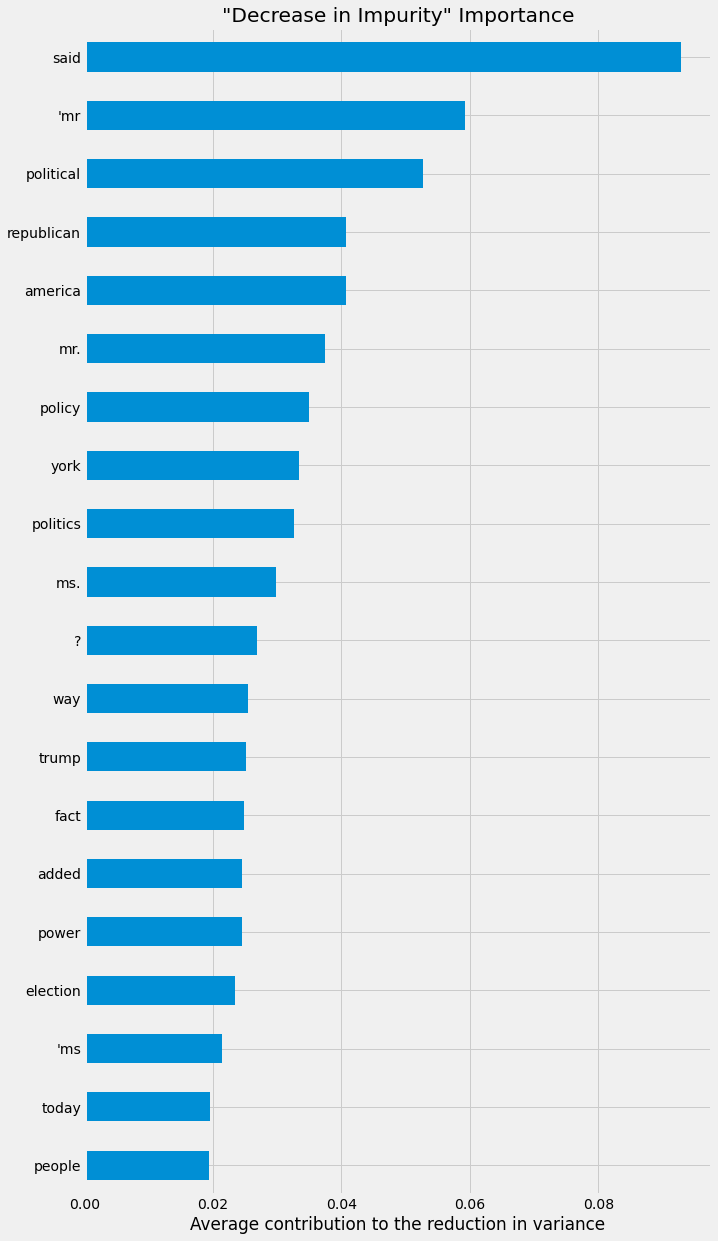

In [82]:
%%time
print(datetime.datetime.now())
feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-20:].plot(kind='barh', figsize=(10,20))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');